# start coding


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
f_1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv',on_bad_lines='skip')
f_2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv',on_bad_lines='skip')
f_3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',on_bad_lines='skip')
f_4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',on_bad_lines='skip')

C:\Users\MINA\AppData\Local\Temp\ipykernel_19000\3799509170.py:1: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  f_1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv',on_bad_lines='skip')


In [3]:
df = pd.concat([f_1,f_2,f_3,f_4])

In [4]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [5]:
df.shape

(7941282, 23)

<Axes: >

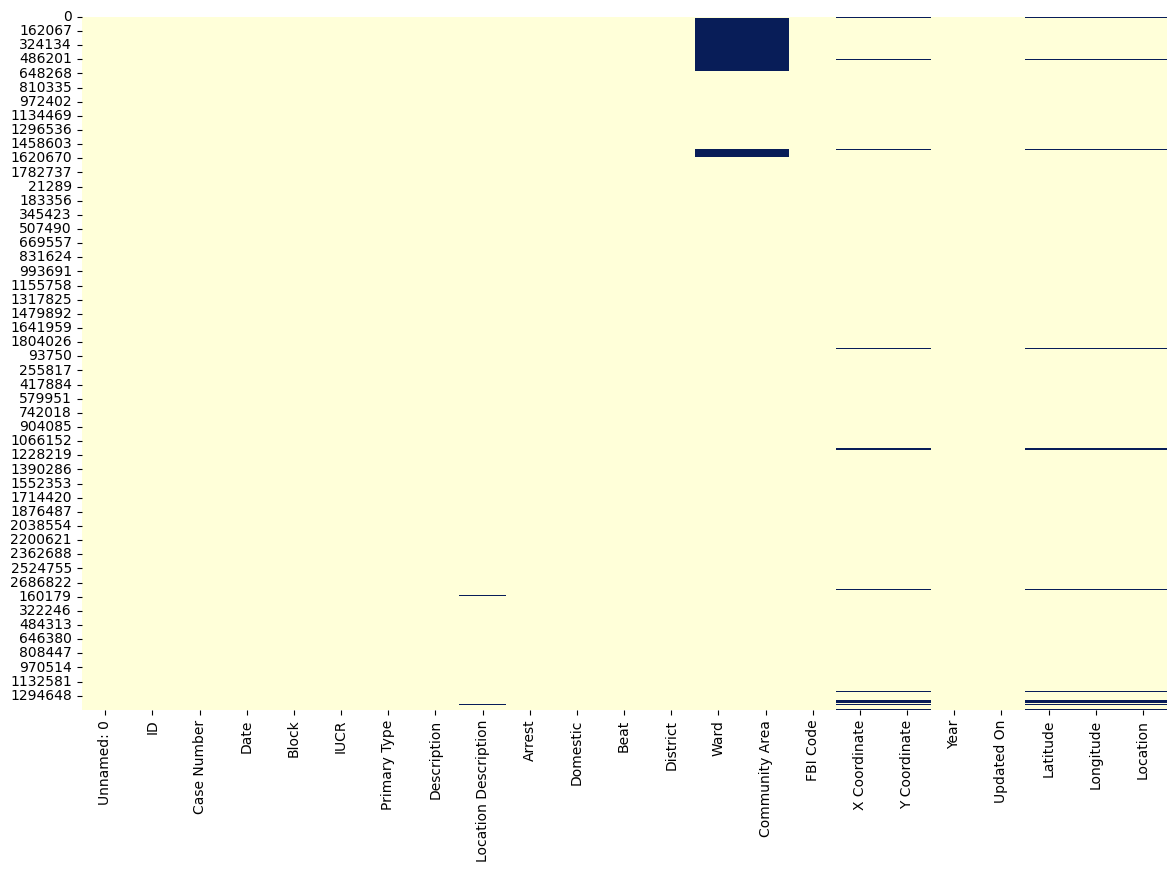

In [13]:
plt.figure(figsize=(14,9))
sns.heatmap(df.isnull(),cbar=False, cmap='YlGnBu')

In [7]:
df = df.drop(['Unnamed: 0','Case Number','ID','IUCR','X Coordinate', 'Y Coordinate','Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area' , 'Location', 'District','Latitude' , 'Longitude'],axis=1)

KeyError: "['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude', 'Longitude'] not found in axis"

In [8]:
df.shape

(7941282, 7)

In [9]:
df.Date = pd.to_datetime(df.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [10]:
df.index = pd.DatetimeIndex(df.Date)

In [11]:
df['Primary Type'].value_counts().iloc[:15]

Primary Type
THEFT                         1640506
BATTERY                       1442716
CRIMINAL DAMAGE                923000
NARCOTICS                      885431
OTHER OFFENSE                  491922
ASSAULT                        481661
BURGLARY                       470958
MOTOR VEHICLE THEFT            370548
ROBBERY                        300453
DECEPTIVE PRACTICE             280931
CRIMINAL TRESPASS              229366
PROSTITUTION                    86401
WEAPONS VIOLATION               77429
PUBLIC PEACE VIOLATION          58548
OFFENSE INVOLVING CHILDREN      51441
Name: count, dtype: int64

In [12]:
p =df['Primary Type'].value_counts().index
p

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'CRIM SEXUAL ASSAULT', 'SEX OFFENSE',
       'GAMBLING', 'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'ARSON', 'HOMICIDE', 'KIDNAPPING', 'INTIMIDATION', 'STALKING',
       'OBSCENITY', 'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL', 'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL',
       'RITUALISM', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'DOMESTIC VIOLENCE'],
      dtype='object', name='Primary Type')

<Axes: xlabel='count', ylabel='Primary Type'>

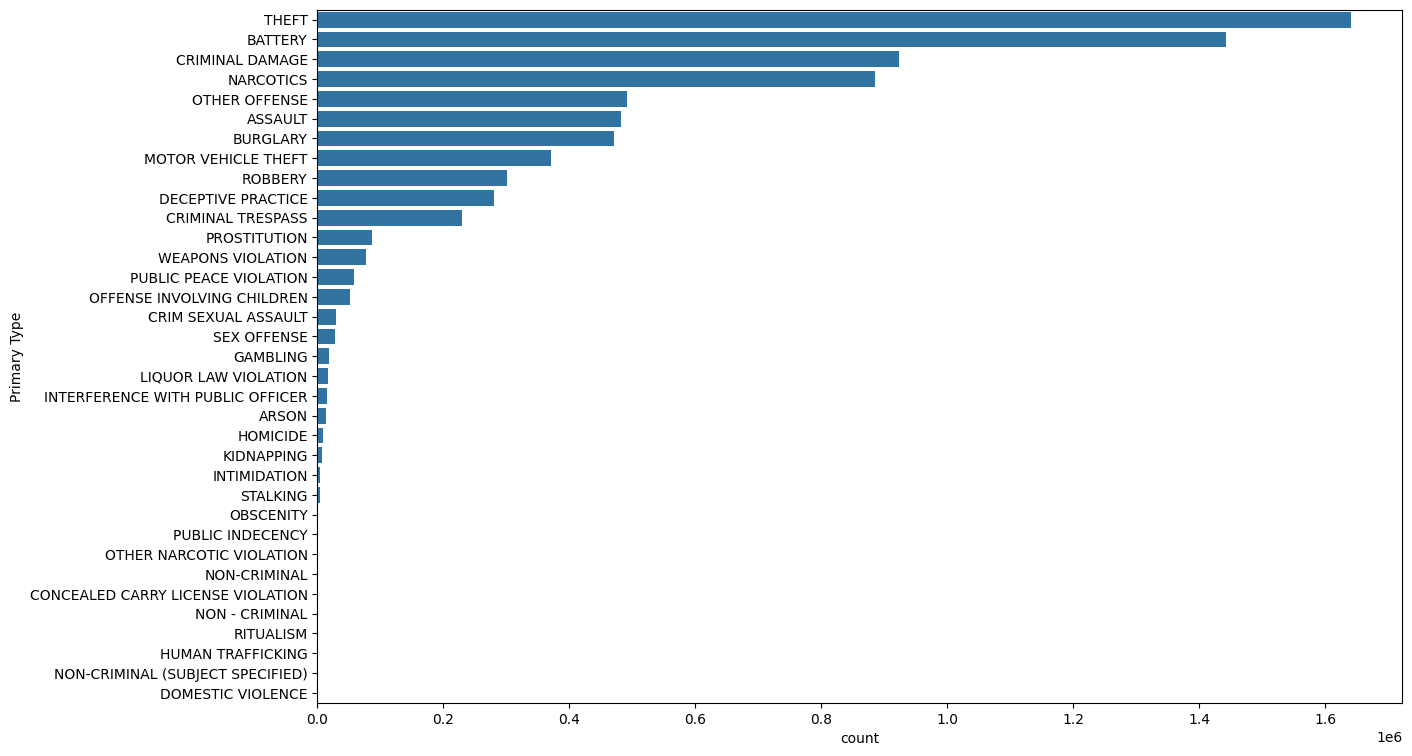

In [13]:
plt.figure(figsize=(14,9))
sns.countplot(y='Primary Type', data = df, order=p)

<Axes: xlabel='count', ylabel='Location Description'>

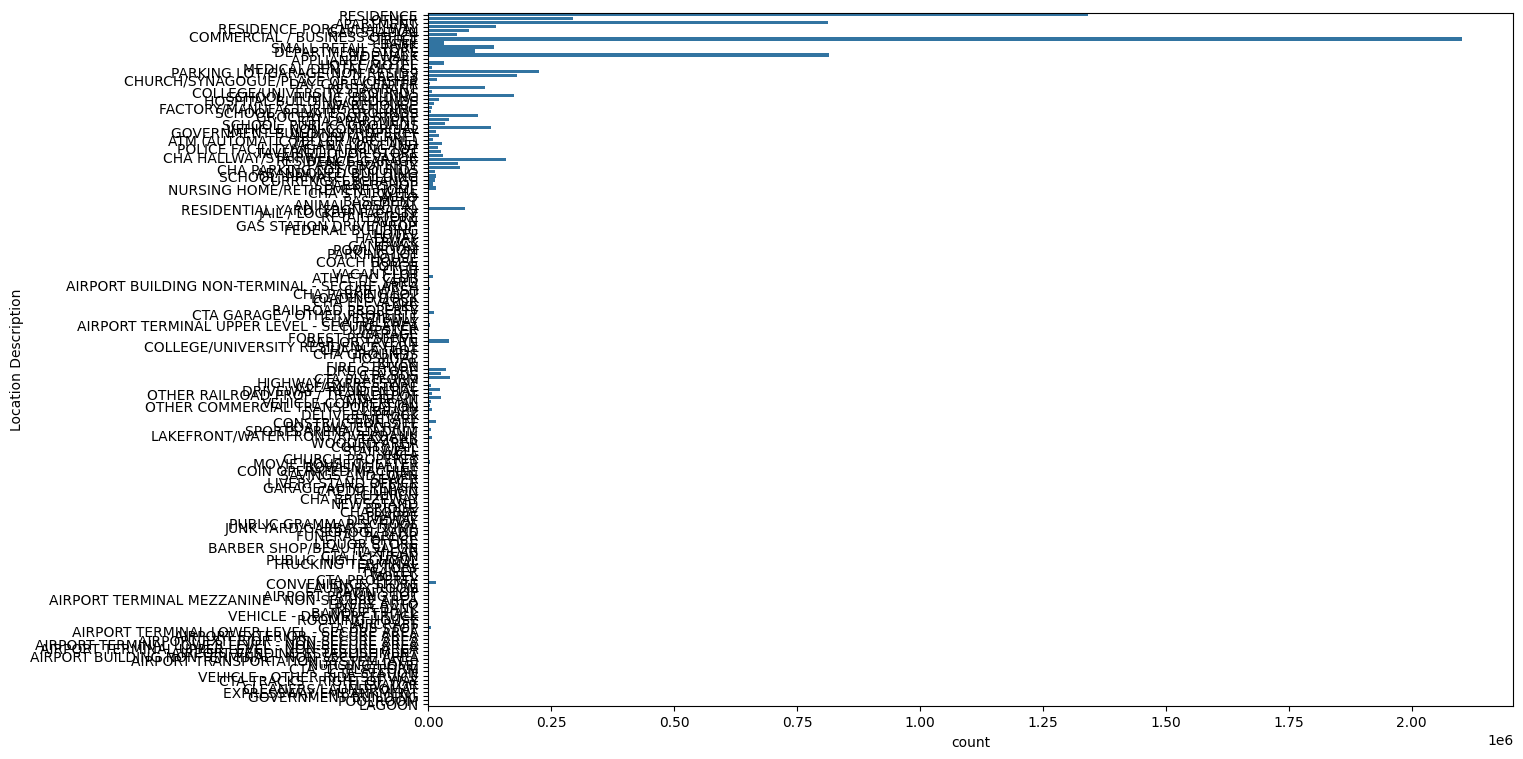

In [14]:
plt.figure(figsize=(14,9))
sns.countplot(y ='Location Description', data = df.dropna())

In [15]:
df.resample('Y').size()

C:\Users\MINA\AppData\Local\Temp\ipykernel_19000\2465074692.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').size()


Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: YE-DEC, dtype: int64

C:\Users\MINA\AppData\Local\Temp\ipykernel_19000\1269032693.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(df.resample('Y').size())


Text(0, 0.5, 'number of crimes ')

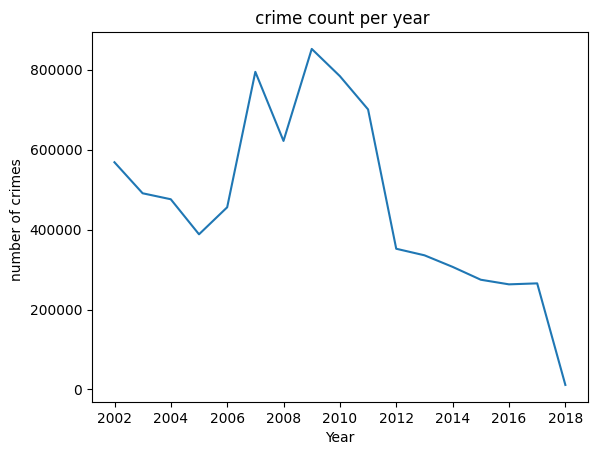

In [16]:
plt.plot(df.resample('Y').size())
plt.title(' crime count per year')
plt.xlabel('Year')
plt.ylabel('number of crimes ')

C:\Users\MINA\AppData\Local\Temp\ipykernel_19000\3760894198.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df.resample('M').size())


Text(0, 0.5, 'number of crimes ')

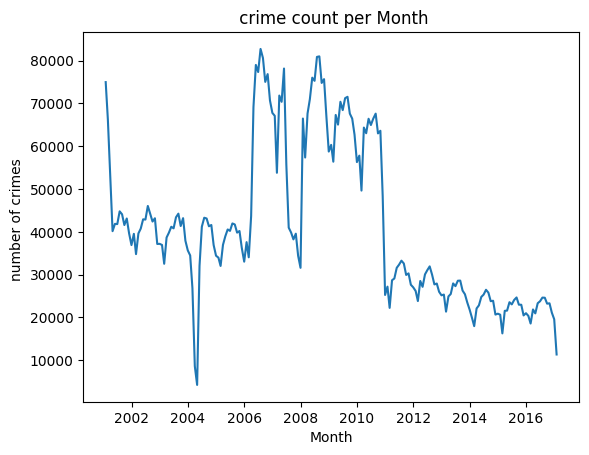

In [17]:
plt.plot(df.resample('M').size())
plt.title(' crime count per Month')
plt.xlabel('Month')
plt.ylabel('number of crimes ')

Text(0, 0.5, 'number of crimes ')

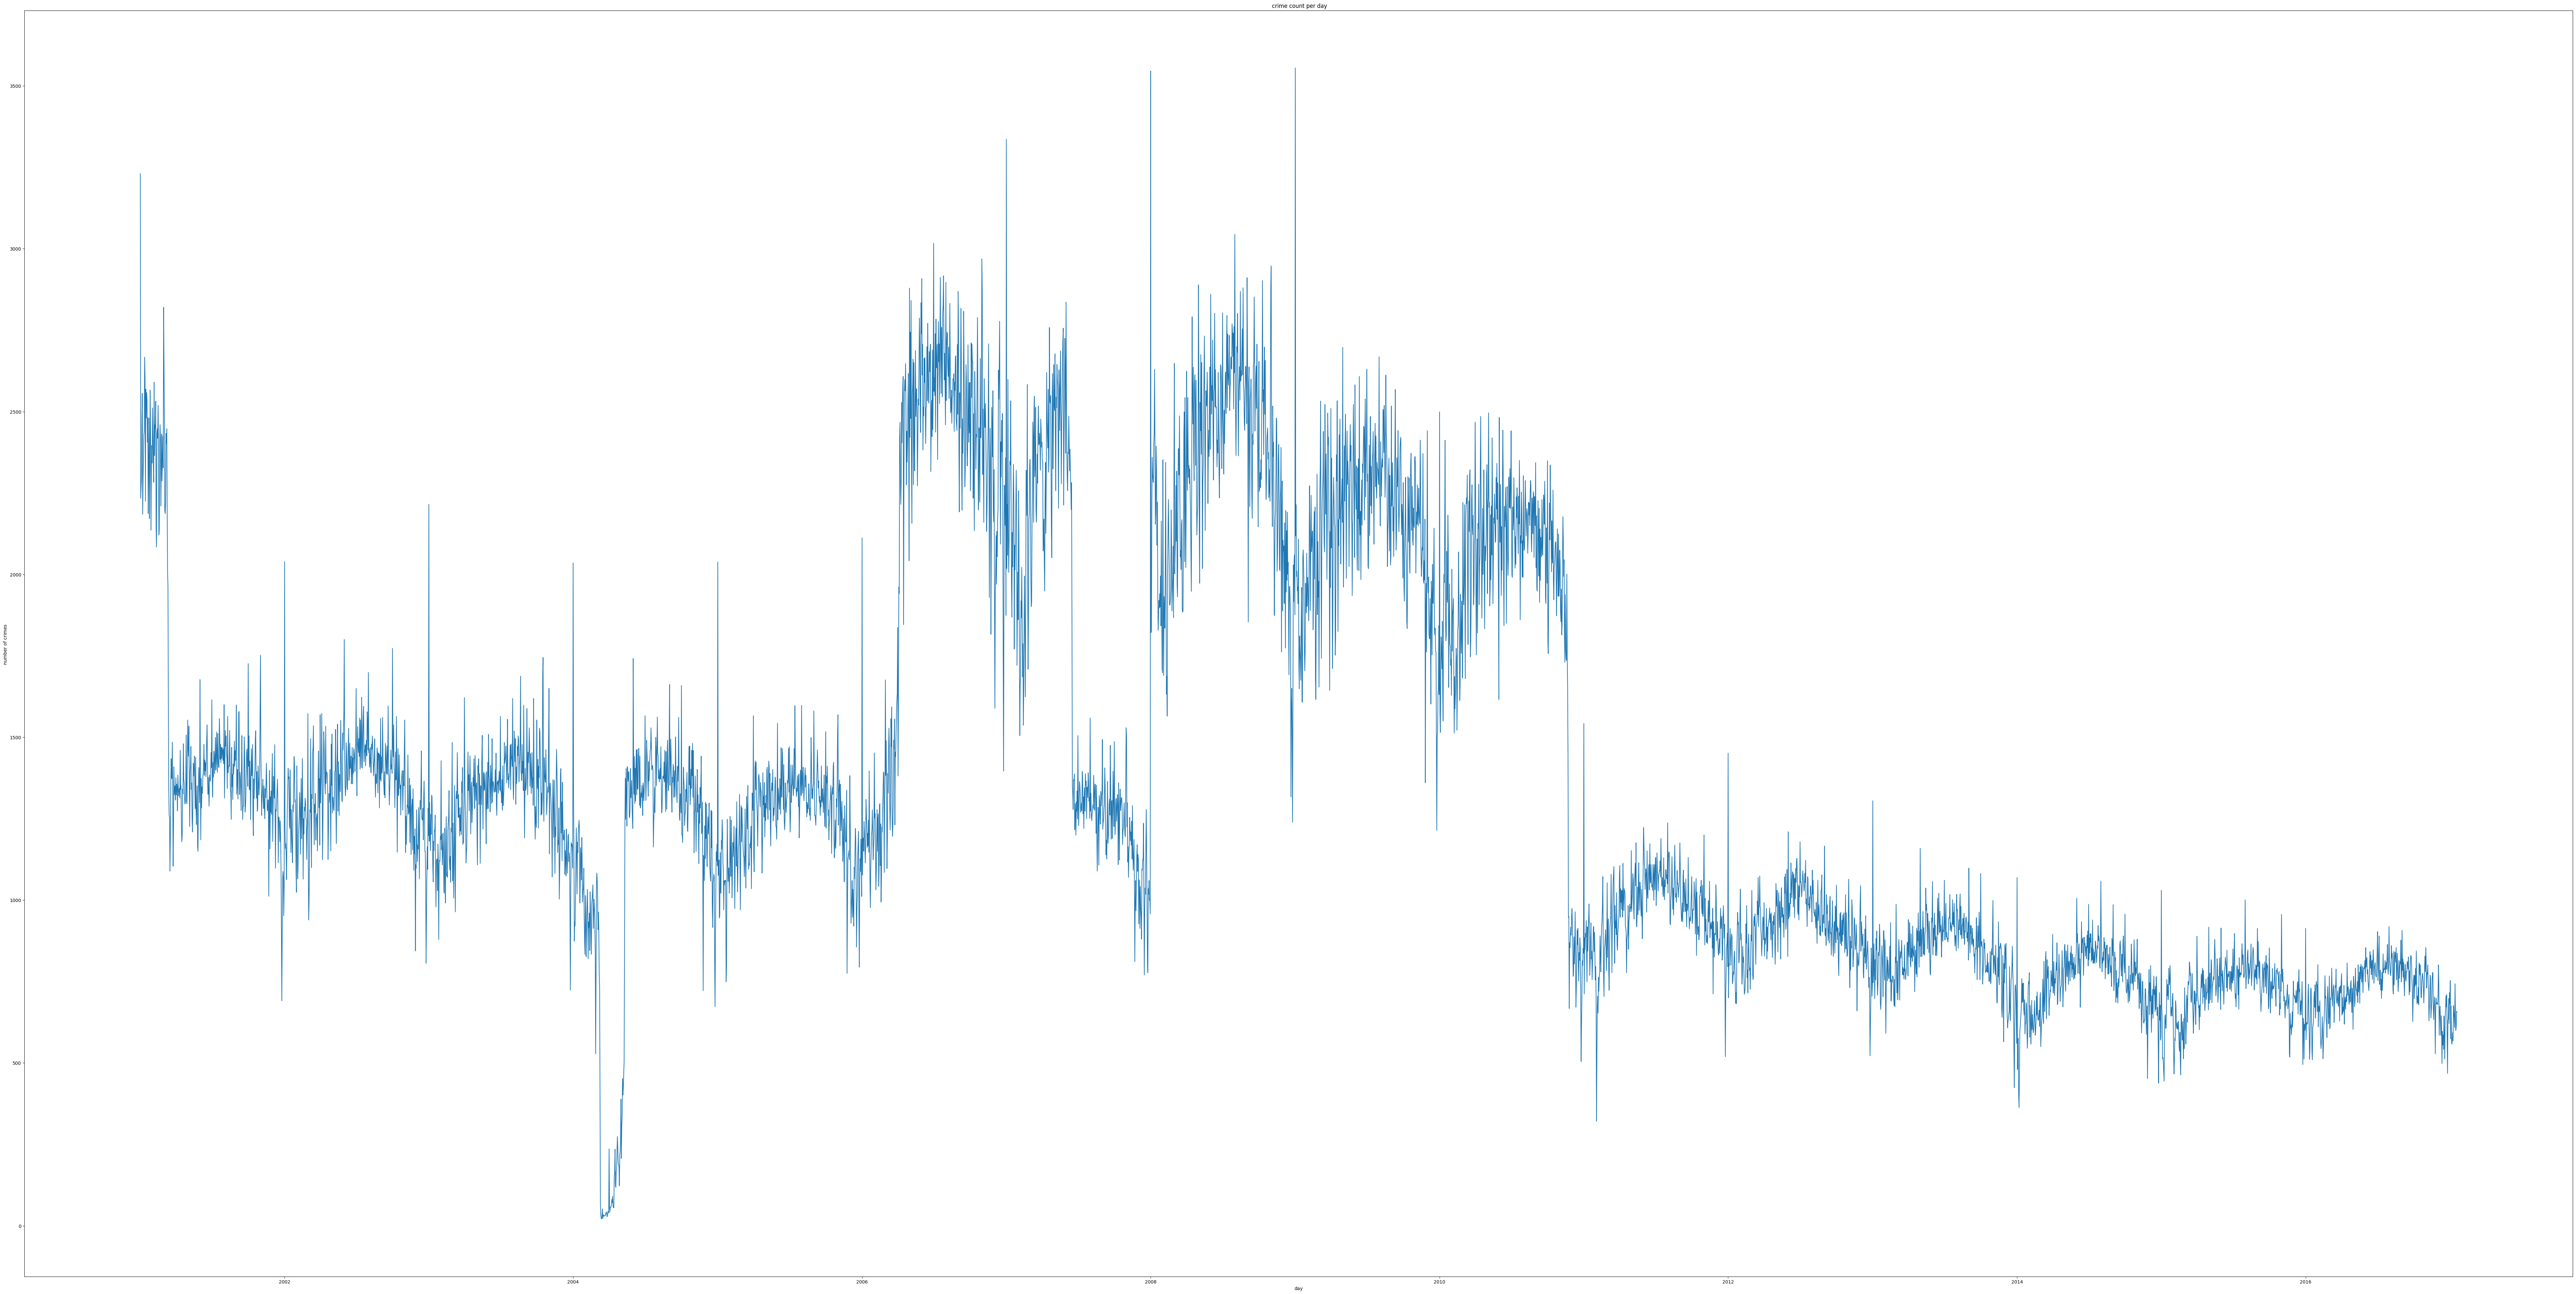

In [18]:
plt.figure(figsize=(100,50))
plt.plot(df.resample('D').size())
plt.title(' crime count per day')
plt.xlabel('day')
plt.ylabel('number of crimes ')

# Preparing The Data

In [19]:
df_prophet = df.resample('M').size().reset_index()
df_prophet.columns = ['ds', 'y']

C:\Users\MINA\AppData\Local\Temp\ipykernel_19000\2050641213.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_prophet = df.resample('M').size().reset_index()


In [20]:
df_prophet

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


# Training Model

In [21]:
from prophet import Prophet

c:\Users\MINA\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [22]:
m =  Prophet()
m.fit (df_prophet)

07:20:40 - cmdstanpy - INFO - Chain [1] start processing
07:20:41 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

c:\Users\MINA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\MINA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


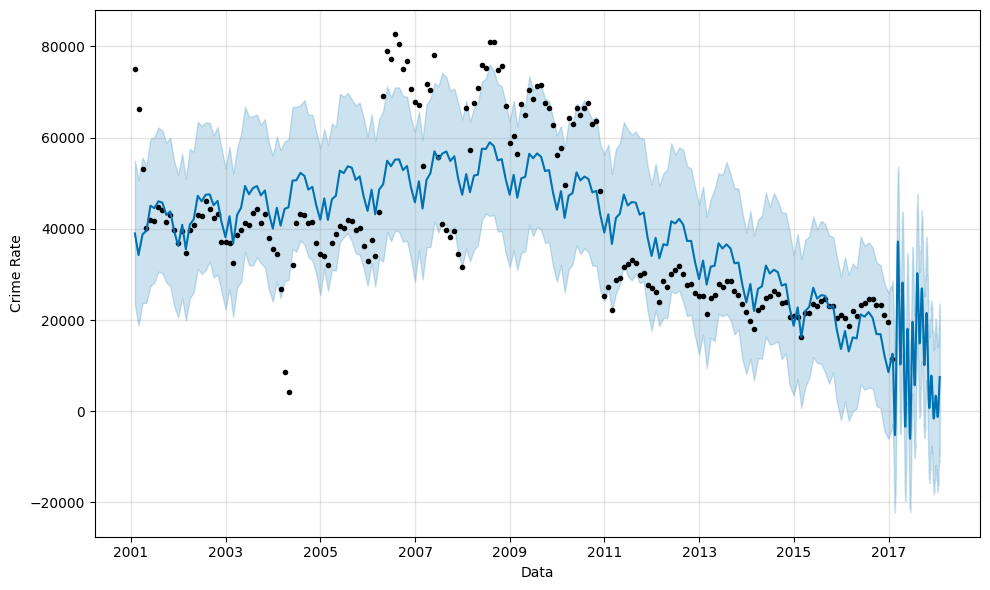

In [43]:
figure = m.plot(forecast, xlabel = 'Data', ylabel = 'Crime Rate')

c:\Users\MINA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\MINA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\MINA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series contain

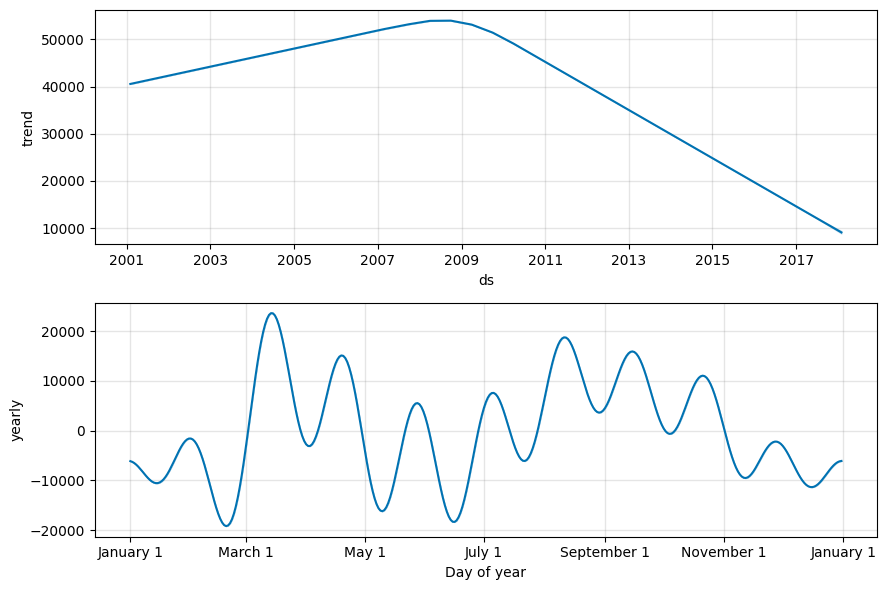

In [44]:
figure = m.plot_components(forecast)